In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Importation des données

In [2]:
data_path = os.path.join(os.getcwd(), 'data')
agence_df = pd.read_csv(os.path.join(data_path, 'agence.csv'),
                        dtype={'code_postal': str})
france_df = pd.read_csv(os.path.join(data_path, 'france.csv'),
                        dtype={'adresse_code_voie': str, 'code_commune': str, 'code_postal': str})
insee_df = pd.read_csv(os.path.join(data_path, 'insee_commune.csv'),
                       dtype={'CODGEO': str, 'DEP': str})
localisation_df = pd.read_csv(os.path.join(data_path, 'localisation_commune.csv'),
                              dtype={'Code_postal': str})

In [3]:
agence_df

,date_mutation,valeur_fonciere,code_postal,nom_commune,id_parcelle,type_local,surface_reelle_bati,surface_terrain,nombre_pieces_principales,agent,prixcible,prixvente_initial,evaluation_agent
0,2014-01-03,210000.0,31000,Toulouse,31555815AC0067,Appartement,70.0,70.0,3.0,1,206000,216000,Renove
1,2014-02-07,162500.0,31500,Toulouse,31555807AB0464,Appartement,67.0,67.0,3.0,1,155000,163000,Ancien
2,2014-02-18,381000.0,31200,Toulouse,31555802AC0160,Appartement,100.0,100.0,4.0,1,391000,411000,Renove
3,2014-02-24,159900.0,31200,Toulouse,31555830AE0006,Appartement,57.0,57.0,3.0,1,170000,178000,Renove
4,2014-02-26,58000.0,31100,Toulouse,31555843AT0121,Appartement,34.0,34.0,2.0,1,62000,65000,Ancien
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2017-07-13,140000.0,31600,Saint-Clar-de-Rivière,314750000C1781,Appartement,100.0,100.0,4.0,2,150000,158000,Ancien
3996,2017-04-14,108500.0,31600,Eaunes,31165000AP0146,Appartement,64.0,64.0,3.0,5,111000,117000,Ancien
3997,2018-01-27,90000.0,31600,Eaunes,31165000AN0237,Appartement,52.0,52.0,3.0,8,86000,90000,Renove
3998,2017-07-27,204900.0,31700,Beauzelle,31056000AK0260,Appartement,81.0,81.0,4.0,5,209000,219000,Ancien


In [4]:
agence_df.describe()

,valeur_fonciere,surface_reelle_bati,surface_terrain,nombre_pieces_principales,agent,prixcible,prixvente_initial
count,4.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03,4.000000e+03
mean,2.124442e+05,77.036250,280.131750,3.343750,4.511750,2.161692e+05,2.270006e+05
std,1.350077e+05,42.930131,408.480567,1.555214,2.892914,1.379113e+05,1.448099e+05
min,2.200000e+04,12.000000,8.000000,1.000000,0.000000,2.400000e+04,2.500000e+04
25%,1.148075e+05,45.000000,45.000000,2.000000,2.000000,1.157500e+05,1.217500e+05
50%,1.830000e+05,70.500000,81.000000,3.000000,5.000000,1.870000e+05,1.960000e+05
75%,2.735090e+05,99.000000,404.000000,4.000000,7.000000,2.780000e+05,2.920000e+05
max,1.500000e+06,385.000000,7432.000000,11.000000,9.000000,1.532000e+06,1.609000e+06


In [5]:
france_df

,date_mutation,valeur_fonciere,adresse_code_voie,code_postal,nom_commune,code_commune,id_parcelle,type_local,surface_reelle_bati,surface_terrain,...,carreau_Ind_11_17,carreau_Ind_18_24,carreau_Ind_25_39,carreau_Ind_40_54,carreau_Ind_55_64,carreau_Ind_65_79,carreau_Ind_80p,carreau_Ind_inc,carreau_I_pauv,carreau_t_maille
0,2014-01-09,251500.0,0006,01310,Polliat,01301,01301000AH0260,Maison,147.0,1501.0,...,35.5,30.8,74.2,86.0,86.0,55.0,20.0,7.0,0,1000
1,2017-06-12,325000.0,0241,01310,Polliat,01301,01301000AH0169,Maison,132.0,896.0,...,35.5,30.8,74.2,86.0,86.0,55.0,20.0,7.0,0,1000
2,2018-04-13,236850.0,0006,01310,Polliat,01301,01301000AH0250,Maison,108.0,1358.0,...,35.5,30.8,74.2,86.0,86.0,55.0,20.0,7.0,0,1000
3,2018-04-23,186000.0,0048,01310,Polliat,01301,01301000AH0079,Maison,123.0,785.0,...,35.5,30.8,74.2,86.0,86.0,55.0,20.0,7.0,0,1000
4,2014-01-11,370000.0,0260,01250,Tossiat,01422,014220000D0110,Maison,220.0,880.0,...,73.3,48.4,133.1,154.0,104.0,80.2,33.9,15.8,0,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641115,2020-01-22,250000.0,2236,75014,Paris 14e Arrondissement,75114,75114000DS0005,Appartement,22.0,22.0,...,6.0,7.5,47.0,30.0,19.0,38.0,21.0,3.0,0,200
2641116,2020-03-17,285000.0,2236,75014,Paris 14e Arrondissement,75114,75114000DS0005,Appartement,27.0,27.0,...,6.0,7.5,47.0,30.0,19.0,38.0,21.0,3.0,0,200
2641117,2020-04-15,12104743.0,2657,75014,Paris 14e Arrondissement,75114,75114000AG0051,Appartement,38.0,529.0,...,47.5,24.5,189.0,161.0,115.0,114.0,42.0,16.0,0,200
2641118,2020-03-13,380000.0,2554,75015,Paris 15e Arrondissement,75115,75115000AO0001,Appartement,61.0,61.0,...,19.0,7.0,32.0,51.0,32.0,37.0,13.0,9.0,0,200


In [6]:
france_df.describe()

,valeur_fonciere,surface_reelle_bati,surface_terrain,nombre_pieces_principales,longitude,latitude,departement,index_right,carreau_Ind,carreau_Men,...,carreau_Ind_11_17,carreau_Ind_18_24,carreau_Ind_25_39,carreau_Ind_40_54,carreau_Ind_55_64,carreau_Ind_65_79,carreau_Ind_80p,carreau_Ind_inc,carreau_I_pauv,carreau_t_maille
count,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,...,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06,2.641120e+06
mean,2.134029e+05,8.638077e+01,4.798850e+02,3.728977e+00,2.160836e+00,4.691748e+01,5.130210e+01,6.945903e+04,4.497598e+03,2.050637e+03,...,3.700525e+02,2.556357e+02,8.166572e+02,8.952387e+02,5.729212e+02,6.416276e+02,2.783789e+02,9.903804e+01,1.326710e-03,2.312857e+03
std,2.594034e+06,4.322256e+01,1.317433e+03,1.590941e+00,2.661342e+00,2.342521e+00,2.667121e+01,4.599476e+04,1.605602e+04,7.404068e+03,...,1.332947e+03,8.918971e+02,2.651976e+03,3.214893e+03,2.191665e+03,2.522464e+03,1.101119e+03,3.732444e+02,3.946426e-02,4.322111e+03
min,1.500000e-01,1.000000e+00,1.000000e+00,1.000000e+00,-5.123991e+00,4.136793e+01,1.000000e+00,0.000000e+00,1.200000e+01,1.070000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+02
25%,1.000000e+05,5.800000e+01,7.500000e+01,3.000000e+00,1.886015e-01,4.484428e+01,3.100000e+01,3.111100e+04,4.050000e+02,1.752000e+02,...,3.250000e+01,2.090000e+01,6.800000e+01,8.190000e+01,5.010000e+01,5.100000e+01,1.900000e+01,8.000000e+00,0.000000e+00,1.000000e+03
50%,1.600000e+05,8.300000e+01,3.100000e+02,4.000000e+00,2.346594e+00,4.733845e+01,5.300000e+01,5.725700e+04,1.159000e+03,5.079000e+02,...,9.550000e+01,6.040000e+01,1.961000e+02,2.352000e+02,1.460000e+02,1.570000e+02,6.100000e+01,2.400000e+01,0.000000e+00,1.000000e+03
75%,2.459825e+05,1.080000e+02,6.130000e+02,5.000000e+00,4.025227e+00,4.885826e+01,7.600000e+01,1.132390e+05,3.020500e+03,1.345200e+03,...,2.524000e+02,1.770000e+02,5.619000e+02,6.020000e+02,3.728000e+02,3.980000e+02,1.738000e+02,6.600000e+01,0.000000e+00,2.000000e+03
max,3.300000e+09,1.500000e+03,5.670800e+05,1.120000e+02,9.557005e+00,5.108207e+01,9.500000e+01,1.429200e+05,1.919325e+05,8.997680e+04,...,1.572270e+04,1.038730e+04,2.966760e+04,3.821160e+04,2.706590e+04,3.113120e+04,1.356250e+04,4.806500e+03,9.000000e+00,3.200000e+04


In [7]:
insee_df

,CODGEO,LIBGEO,REG,DEP,P16_POP,P11_POP,SUPERF,NAIS1116,DECE1116,P16_MEN,...,P16_ACT1564,ETTOT15,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015
0,01001,L'Abergement-Clémenciat,84,01,767,780,15.95,41,25,306.000000,...,376.000000,50.0,11.0,3.0,5.0,24.0,5.0,7.0,10.0,0.0
1,01002,L'Abergement-de-Varey,84,01,243,234,9.15,21,7,101.000000,...,123.000000,19.0,2.0,3.0,0.0,11.0,3.0,3.0,2.0,0.0
2,01004,Ambérieu-en-Bugey,84,01,14081,13839,24.60,1114,595,6348.757303,...,6697.333122,1337.0,7.0,52.0,131.0,907.0,290.0,240.0,399.0,109.0
3,01005,Ambérieux-en-Dombes,84,01,1671,1600,15.92,101,42,640.000000,...,864.845592,141.0,14.0,7.0,27.0,78.0,20.0,15.0,27.0,5.0
4,01006,Ambléon,84,01,110,112,5.88,9,6,53.000000,...,58.000000,7.0,0.0,0.0,0.0,5.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34948,97420,Sainte-Suzanne,4,974,23224,22574,57.84,1857,524,8249.372621,...,11192.793455,1341.0,126.0,138.0,198.0,712.0,246.0,167.0,276.0,69.0
34949,97421,Salazie,4,974,7400,7418,103.82,652,255,2584.000000,...,3236.954474,454.0,127.0,27.0,43.0,205.0,72.0,52.0,98.0,15.0
34950,97422,Le Tampon,4,974,77283,74998,165.43,6648,1996,30545.864866,...,34953.949403,5296.0,479.0,343.0,687.0,2967.0,995.0,820.0,1098.0,202.0
34951,97423,Les Trois-Bassins,4,974,7111,7226,42.58,502,224,2482.000000,...,3484.958220,456.0,42.0,38.0,66.0,217.0,68.0,93.0,68.0,19.0


In [8]:
insee_df.describe()

,REG,P16_POP,P11_POP,SUPERF,NAIS1116,DECE1116,P16_MEN,NAISD18,DECESD18,P16_LOG,...,P16_ACT1564,ETTOT15,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015
count,34953.000000,3.495300e+04,3.495300e+04,34953.00000,34953.000000,34953.000000,3.495300e+04,34953.000000,34953.000000,3.495300e+04,...,3.495300e+04,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000,34952.000000
mean,52.298858,1.898597e+03,1.857735e+03,18.10242,115.798673,80.855005,8.364629e+02,21.373273,17.359197,1.016652e+03,...,8.793596e+02,187.740101,11.257038,9.892052,18.934224,121.657387,30.454280,25.999399,43.375143,10.875916
std,24.317846,1.507632e+04,1.518311e+04,147.46471,1037.360641,528.839618,7.608593e+03,198.299199,108.374213,9.034285e+03,...,7.717784e+03,3108.177206,16.009760,89.096776,152.987578,2566.894301,376.983582,317.645175,707.752849,148.026732
min,1.000000,0.000000e+00,0.000000e+00,0.04000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.990000e+02,1.980000e+02,6.48000,9.000000,8.000000,8.552795e+01,1.000000,1.000000,1.178293e+02,...,9.100000e+01,19.000000,4.000000,1.000000,2.000000,7.000000,2.000000,2.000000,4.000000,0.000000
50%,44.000000,4.560000e+02,4.490000e+02,10.93000,23.000000,17.000000,1.909375e+02,4.000000,4.000000,2.477395e+02,...,2.134581e+02,39.000000,7.000000,3.000000,5.000000,17.000000,4.000000,4.000000,8.000000,1.000000
75%,76.000000,1.154000e+03,1.125000e+03,18.92000,60.000000,46.000000,4.785836e+02,11.000000,10.000000,5.954130e+02,...,5.370872e+02,96.000000,13.000000,7.000000,12.000000,50.000000,14.000000,12.000000,20.000000,4.000000
max,94.000000,2.190327e+06,2.249975e+06,18360.00000,145731.000000,69309.000000,1.140127e+06,27367.000000,13888.000000,1.374377e+06,...,1.186864e+06,546320.000000,545.000000,14846.000000,22441.000000,458229.000000,62538.000000,50259.000000,124370.000000,24919.000000


In [9]:
localisation_df

,Code_commune_INSEE,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps
0,01001,L ABERGEMENT CLEMENCIAT,1400,NaN,L ABERGEMENT CLEMENCIAT,L ABERGEMENT CLEMENCIAT,"46.1534255214,4.92611354223"
1,01005,AMBERIEUX EN DOMBES,1330,NaN,AMBERIEUX EN DOMBES,AMBERIEUX EN DOMBES,"45.9961799872,4.91227250796"
2,01009,ANDERT ET CONDON,1300,NaN,ANDERT ET CONDON,ANDERT ET CONDON,"45.7873565333,5.65788307924"
3,01017,ARGIS,1230,NaN,ARGIS,ARGIS,"45.9337182132,5.48251100314"
4,01019,ARMIX,1510,NaN,ARMIX,ARMIX,"45.8541838459,5.58357838695"
...,...,...,...,...,...,...,...
39187,98818,NOUMEA,98800,NaN,NOUMEA,NOUMEA,NaN
39188,98821,PAITA,98890,NaN,PAITA,PAITA,NaN
39189,98823,PONERIHOUEN,98823,NaN,PONERIHOUEN,PONERIHOUEN,NaN
39190,98829,THIO,98829,NaN,THIO,THIO,NaN


In [10]:
localisation_df.describe()

,Code_commune_INSEE,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,Libell_d_acheminement,coordonnees_gps
count,39192,39192,39192,4661,39192,39192,38922
unique,35099,32771,6328,4405,32917,32917,35006
top,14371,ST PIERRE EN AUGE,51300,MOOREA MAIAO,MARSEILLE,MARSEILLE,"49.005159699,0.165980940625"
freq,22,22,46,20,27,27,22


# Préparation des données

In [11]:
# Focus sur les zones pertinentes pour l'agence
list_cp_agence = agence_df['code_postal'].unique()
france_df = france_df[france_df['code_postal'].isin(list_cp_agence)]
localisation_df = localisation_df[localisation_df['Code_postal'].isin(list_cp_agence)]

list_code_insee = localisation_df['Code_commune_INSEE'].unique()
insee_df = insee_df[insee_df['CODGEO'].isin(list_code_insee)]

# On supprime les ventes des batiments qui ont moins de 5 m2
france_df = france_df[france_df['surface_reelle_bati']>5]

print(localisation_df.shape)
print(france_df.shape)
print(agence_df.shape)
print(insee_df.shape)

(41, 7)
(28736, 46)
(4000, 13)
(36, 36)


In [12]:
# On croise les données de localisation avec les informations INSEE
localisation_df = localisation_df.merge(insee_df, left_on='Code_commune_INSEE', right_on='CODGEO')

# On doit ensuite les agréger à la maille code_postal 
localisation_df = localisation_df.groupby('Code_postal').agg({
    'P16_POP':'sum',
    'P11_POP':'sum',
    'SUPERF':'sum',
    'NAIS1116':'sum',
    'DECE1116':'sum',
    'P16_MEN':'sum',
    'NAISD18':'sum',
    'DECESD18':'sum',
    'P16_LOG':'sum',
    'P16_RP':'sum',
    'P16_RSECOCC':'sum',
    'P16_LOGVAC':'sum',
    'P16_RP_PROP':'sum',
    'NBMENFISC16':'sum',
    'PIMP16':'mean',
    'MED16':'median',
    'TP6016':'mean',
    'P16_EMPLT':'sum',
    'P16_EMPLT_SAL':'sum',
    'P11_EMPLT':'sum',
    'P16_POP1564':'sum',
    'P16_CHOM1564':'sum',
    'P16_ACT1564':'sum',
    'ETTOT15':'sum',
    'ETAZ15':'sum',
    'ETBE15':'sum',
    'ETFZ15':'sum',
    'ETGU15':'sum',
    'ETGZ15':'sum',
    'ETOQ15':'sum',
    'ETTEF115':'sum',
    'ETTEFP1015':'sum'
})

In [13]:
print(localisation_df.shape)
print(france_df.shape)
print(agence_df.shape)
print(insee_df.shape)

(14, 32)
(28736, 46)
(4000, 13)
(36, 36)


In [14]:
print(agence_df.date_mutation.min())
print(agence_df.date_mutation.max())
print(france_df.date_mutation.min())
print(france_df.date_mutation.max())

2014-01-03
2020-06-30
2014-01-02
2020-06-30


# Feature engineering

## Variables crées
- P16_POP_PER_SUPERF : population en 2016 divisée par la superficie en km2
- valeur_surface : valeur foncière divisée par la surface réelle
- log_valeur_surface : log(valeur_surface)
- surface_par_piece : surface divisée par le nombre de pièces principales
- P16_LOG_PER_POP : nombre de logements divisé par la population
- P16_LOGVAC_PER_POP : nombre de logements vacants divisé par la population

In [15]:
def add_new_variables(df):
    df_2 = df.copy()
    df_2 = df_2.merge(localisation_df, left_on='code_postal', right_on='Code_postal')
    df_2['P16_POP_PER_SUPERF'] = df_2['P16_POP'] / df_2['SUPERF']
    df_2['valeur_surface'] = df_2['valeur_fonciere'] / df_2['surface_reelle_bati']
    df_2['log_valeur_surface'] = np.log(df_2['valeur_surface'])
    df_2['surface_par_piece'] = df_2['surface_reelle_bati'] / df_2['nombre_pieces_principales']
    df_2['P16_LOG_PER_POP'] = df_2['P16_LOG'] / df_2['P16_POP']
    df_2['P16_LOGVAC_PER_POP'] = df_2['P16_LOGVAC'] / df_2['P16_POP']
    df_2 = pd.get_dummies(df_2, columns=['type_local', 'code_postal'], drop_first=True)
    df_2.date_mutation = pd.to_datetime(df_2.date_mutation, infer_datetime_format=True)
    
    try:
        df_2['prixcible_surface'] = df_2['prixcible'] / df_2['surface_reelle_bati']
        df_2['prixvente_initial_surface'] = df_2['prixvente_initial'] / df_2['surface_reelle_bati']
        df_2['erreur_agent'] = df_2['prixcible_surface'] - df_2['valeur_surface']
        df_2['log_prixcible_surface'] = np.log(df_2['prixcible_surface'])
    except:
        pass
    
    return df_2

france_df = add_new_variables(france_df)
agence_df = add_new_variables(agence_df)

# Analyse des estimations actuelles

## Prix cible vs valeur foncière

In [16]:
def scatter_with_diagonal(x, y):
    f, ax = plt.subplots(figsize=(4.5, 4.5))
    ax.scatter(x, y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="black")

    plt.show()
    coef_corr = str(round(x.corr(y), 6))
    print("Coefficient de corrélation : {}".format(coef_corr))

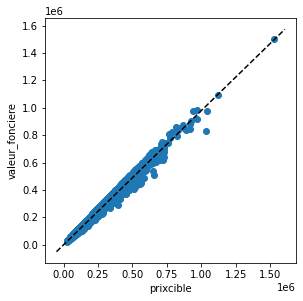

Coefficient de corrélation : 0.994408


In [17]:
scatter_with_diagonal(agence_df['prixcible'], agence_df['valeur_fonciere'])

## Prix cible surface vs valeur foncière surface

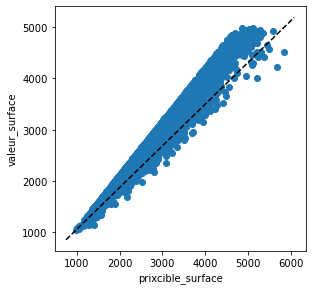

Coefficient de corrélation : 0.979657


In [18]:
scatter_with_diagonal(agence_df['prixcible_surface'], agence_df['valeur_surface'])

## Prix vente initial surface vs valeur foncière surface

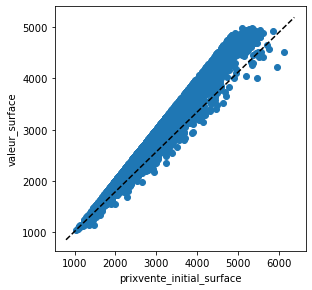

Coefficient de corrélation : 0.979716


In [19]:
scatter_with_diagonal(agence_df['prixvente_initial_surface'], agence_df['valeur_surface'])

## Prix vente initial surface vs prix cible surface

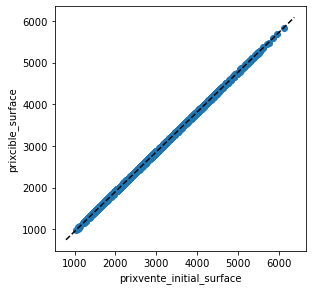

Coefficient de corrélation : 0.999974


In [20]:
scatter_with_diagonal(agence_df['prixvente_initial_surface'], agence_df['prixcible_surface'])

In [29]:
agence_df[['prixcible','prixvente_initial','valeur_fonciere']]

,prixcible,prixvente_initial,valeur_fonciere
0,206000,216000,210000.0
1,57000,60000,57650.0
2,87000,91000,82000.0
3,119000,125000,115000.0
4,202000,212000,188250.0
...,...,...,...
3995,173000,182000,170000.0
3996,141000,148000,135000.0
3997,69000,72580,72580.0
3998,213000,224000,190500.0


In [30]:
np.mean(agence_df['prixvente_initial']/agence_df['prixcible'])-1

0.05016068961510012

In [31]:
np.mean(agence_df['valeur_fonciere']/agence_df['prixvente_initial'])-1

-0.06135069769857193

In [32]:
np.mean(agence_df['valeur_fonciere']/agence_df['prixcible'])-1

-0.014264706233391267

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [22]:
df = agence_df.copy()
models_hist = {}

In [23]:
X_var = ['surface_reelle_bati',
         'log_prixcible_surface',
         'prixcible_surface',
         'surface_terrain',
         'nombre_pieces_principales',
         'P16_POP_PER_SUPERF',
         'surface_par_piece',
         'P16_LOG_PER_POP',
         'P16_LOGVAC_PER_POP',
         'type_local_Maison',
         'code_postal_31100',
         'code_postal_31120',
         'code_postal_31170',
         'code_postal_31200',
         'code_postal_31270',
         'code_postal_31300',
         'code_postal_31400',
         'code_postal_31470',
         'code_postal_31500',
         'code_postal_31600',
         'code_postal_31700',
         'code_postal_31820',
         'code_postal_31830'
        ]

y_var = 'log_valeur_surface'

X = df[X_var]
y = df[y_var]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [24]:
metric_benchmark = mean_squared_error(np.exp(y_test), X_test['prixcible_surface'], squared=False)
metric_benchmark

170.37626355850986

In [25]:
model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
yhat_test = np.exp(model.predict(X_test))
metric_model = mean_squared_error(np.exp(y_test), yhat_test, squared=False)

models_hist['linear_regression']={'model': model, 'error':metric_model}

print(metric_model)
print(round((metric_model/metric_benchmark-1)*100,2))

156.29840414046873
-8.26


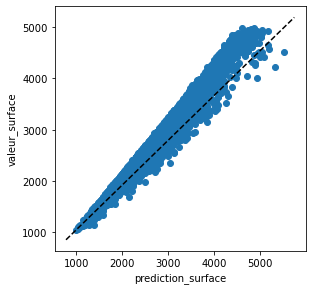

Coefficient de corrélation : 0.98047


In [26]:
df['prediction_surface'] = np.exp(model.predict(X))
df['prediction'] = df['prediction_surface'] * df['surface_reelle_bati']
scatter_with_diagonal(df['prediction_surface'], df['valeur_surface'])

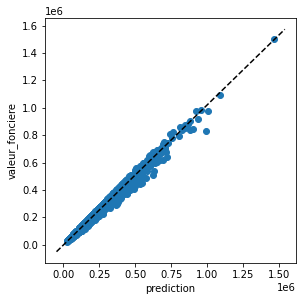

Coefficient de corrélation : 0.994761


In [27]:
scatter_with_diagonal(df['prediction'], df['valeur_fonciere'])

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model = RandomForestRegressor().fit(X_train, y_train)
yhat_test = np.exp(model.predict(X_test))
metric_model = mean_squared_error(np.exp(y_test), yhat_test, squared=False)

models_hist['random_forest']={'model': model, 'error':metric_model}
print(metric_model)
print(round((metric_model/metric_benchmark-1)*100,2))

165.90000335245148
-2.63


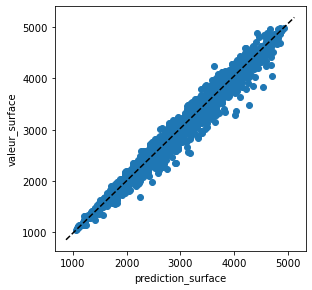

Coefficient de corrélation : 0.990971


In [30]:
df['prediction_surface'] = np.exp(model.predict(X))
df['prediction'] = df['prediction_surface'] * df['surface_reelle_bati']
scatter_with_diagonal(df['prediction_surface'], df['valeur_surface'])

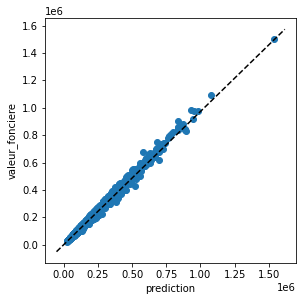

Coefficient de corrélation : 0.997681


In [31]:
scatter_with_diagonal(df['prediction'], df['valeur_fonciere'])

# XGBoost

In [32]:
from xgboost import XGBRegressor

In [33]:
params = {"max_depth": [ 3, 6, 8],
          "colsample_bytree":[ 0.3, 0.4],
          "n_estimators":[10, 30, 60, 100, 300]
         }
clf = GridSearchCV(
            estimator=XGBRegressor(),
            param_grid=params,
            cv=3, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)

model = clf.fit(X_train, y_train)
print(model.best_params_)

yhat_test = np.exp(model.predict(X_test))
metric_model = mean_squared_error(np.exp(y_test), yhat_test, squared=False)
models_hist['xgboost']={'model': model, 'error':metric_model}
print(metric_model)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'colsample_bytree': 0.4, 'max_depth': 3, 'n_estimators': 60}
164.55273252079806


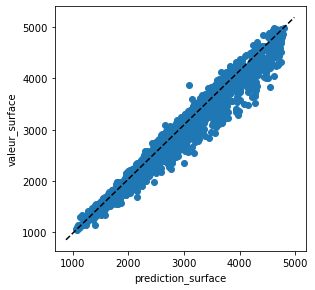

Coefficient de corrélation : 0.98254


In [34]:
df['prediction_surface'] = np.exp(model.predict(X))
df['prediction'] = df['prediction_surface'] * df['surface_reelle_bati']
scatter_with_diagonal(df['prediction_surface'], df['valeur_surface'])

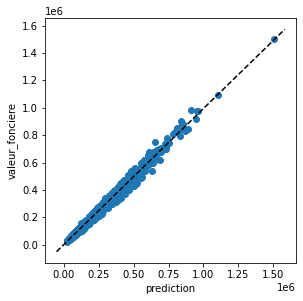

Coefficient de corrélation : 0.995506


In [35]:
scatter_with_diagonal(df['prediction'], df['valeur_fonciere'])

## Exportation du modèle et des données

In [36]:
for key, value in models_hist.items():
    print(key +" : "+ str(value['error']))

linear_regression : 156.29840414046873
random_forest : 165.90000335245148
xgboost : 164.55273252079806


In [37]:
model = models_hist['random_forest']['model']

app_path = os.path.join(os.getcwd(), 'app')
localisation_df.to_csv(os.path.join(app_path, 'insee_code_postal.csv'))
filename = os.path.join(app_path, 'model.sav')
pickle.dump(model, open(filename, 'wb'))

# Essai avec france_df

In [37]:
df = france_df.copy()
models_hist = {}

In [38]:
X_var = ['surface_reelle_bati',
         'surface_terrain',
         'nombre_pieces_principales',
         'P16_POP_PER_SUPERF',
         'surface_par_piece',
         'P16_LOG_PER_POP',
         'P16_LOGVAC_PER_POP',
         'type_local_Maison',
         'code_postal_31100',
         'code_postal_31120',
         'code_postal_31170',
         'code_postal_31200',
         'code_postal_31270',
         'code_postal_31300',
         'code_postal_31400',
         'code_postal_31470',
         'code_postal_31500',
         'code_postal_31600',
         'code_postal_31700',
         'code_postal_31820',
         'code_postal_31830'
        ]

X = df[X_var]
y = df[y_var]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Linear regression

In [39]:
model = LinearRegression(fit_intercept=False).fit(X_train, y_train)
yhat_test = np.exp(model.predict(X_test))
metric_model = mean_squared_error(np.exp(y_test), yhat_test, squared=False)

models_hist['linear_regression']={'model': model, 'error':metric_model}

print(metric_model)

5119.754723633735


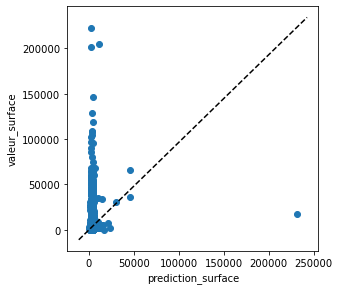

Coefficient de corrélation : 0.145626


In [40]:
df['prediction_surface'] = np.exp(model.predict(X))
df['prediction'] = df['prediction_surface'] * df['surface_reelle_bati']
scatter_with_diagonal(df['prediction_surface'], df['valeur_surface'])

In [41]:
model = RandomForestRegressor().fit(X_train, y_train)
yhat_test = np.exp(model.predict(X_test))
metric_model = mean_squared_error(np.exp(y_test), yhat_test, squared=False)

models_hist['random_forest']={'model': model, 'error':metric_model}
print(metric_model)

,date_mutation,valeur_fonciere,adresse_code_voie,nom_commune,code_commune,id_parcelle,surface_reelle_bati,surface_terrain,nombre_pieces_principales,longitude,...,code_postal_31200,code_postal_31270,code_postal_31300,code_postal_31400,code_postal_31470,code_postal_31500,code_postal_31600,code_postal_31700,code_postal_31820,code_postal_31830
0,2014-01-03,155000.0,5789,Toulouse,31555,31555831AT0256,62.0,62.0,3.0,1.452129,...,1,0,0,0,0,0,0,0,0,0
1,2014-01-06,151000.0,5789,Toulouse,31555,31555831AT0256,63.0,63.0,3.0,1.452129,...,1,0,0,0,0,0,0,0,0,0
2,2014-01-14,235000.0,0124,Toulouse,31555,31555833AN0010,111.0,111.0,5.0,1.461512,...,1,0,0,0,0,0,0,0,0,0
3,2014-01-15,83400.0,7324,Toulouse,31555,31555831AM0031,97.0,97.0,4.0,1.454975,...,1,0,0,0,0,0,0,0,0,0
4,2014-01-24,100000.0,0298,Toulouse,31555,31555833AN0077,49.0,49.0,2.0,1.459935,...,1,0,0,0,0,0,0,0,0,0


## Random Forest

In [47]:
model = RandomForestRegressor(n_estimators=300).fit(X_train, y_train)
yhat_test = np.exp(model.predict(X_test))
metric_model = mean_squared_error(np.exp(y_test), yhat_test, squared=False)

models_hist['random_forest']={'model': model, 'error':metric_model}
print(metric_model)

4150.906341568968


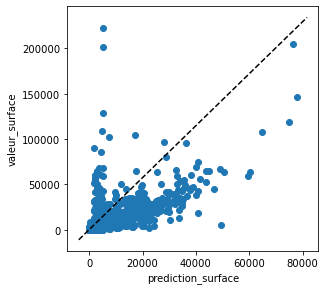

Coefficient de corrélation : 0.680707


In [48]:
df['prediction_surface'] = np.exp(model.predict(X))
df['prediction'] = df['prediction_surface'] * df['surface_reelle_bati']
scatter_with_diagonal(df['prediction_surface'], df['valeur_surface'])

## XGBoost

In [44]:
params = {"max_depth": [ 3, 6, 8],
          "colsample_bytree":[ 0.3, 0.4],
          "n_estimators":[10, 30, 60, 100, 300]
         }
clf = GridSearchCV(
            estimator=XGBRegressor(),
            param_grid=params,
            cv=3, scoring='neg_mean_squared_error', verbose=3, n_jobs=-1)

model = clf.fit(X_train, y_train)
print(model.best_params_)

yhat_test = np.exp(model.predict(X_test))
metric_model = mean_squared_error(np.exp(y_test), yhat_test, squared=False)
models_hist['xgboost']={'model': model, 'error':metric_model}
print(metric_model)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'colsample_bytree': 0.3, 'max_depth': 3, 'n_estimators': 100}
4334.040684680977


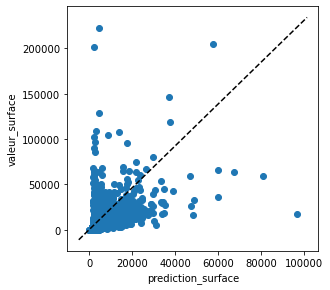

Coefficient de corrélation : 0.529465


In [45]:
df['prediction_surface'] = np.exp(model.predict(X))
df['prediction'] = df['prediction_surface'] * df['surface_reelle_bati']
scatter_with_diagonal(df['prediction_surface'], df['valeur_surface'])

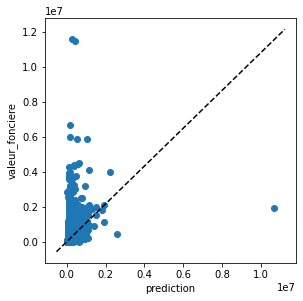

Coefficient de corrélation : 0.524861


In [46]:
scatter_with_diagonal(df['prediction'], df['valeur_fonciere'])